In [2]:
# plot_hardcode
# import lib
# ===========================================================
import csv
import pandas as pd
from datascience import *
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import collections
import math
import sys
from tqdm import tqdm
from time import sleep

In [9]:
# Logistic Regression
LR_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
LR_ACC = np.array([0.50040404, 0.50434343, 0.50656566, 0.51363636, 0.52060606,
       0.52555556, 0.5310101 , 0.53419192, 0.53661616, 0.53287879,
       0.52838384, 0.52762626, 0.52181818, 0.51661616, 0.51141414,
       0.50939394, 0.50414141, 0.50242424, 0.50065657, 0.49979798,
       0.49959596])
LR_FPR = np.array([1.00000000e+00, 9.55317428e-01, 9.19227659e-01, 8.68075212e-01,
       8.10958350e-01, 7.47371613e-01, 6.72058229e-01, 5.91690255e-01,
       5.08896078e-01, 4.33279418e-01, 3.61302062e-01, 2.88313789e-01,
       2.20279013e-01, 1.62454509e-01, 1.16255560e-01, 7.25839062e-02,
       4.16498180e-02, 1.73877881e-02, 4.85240598e-03, 4.04367165e-04,
       0.00000000e+00])
LR_TPR = np.array([1.00000000e+00, 9.63262010e-01, 9.31671377e-01, 8.94731530e-01,
       8.51635042e-01, 7.98041986e-01, 7.33750505e-01, 6.59870811e-01,
       5.82054905e-01, 4.99091643e-01, 4.18247881e-01, 3.43863545e-01,
       2.64331853e-01, 1.96205087e-01, 1.39685103e-01, 9.20468308e-02,
       5.06661284e-02, 2.30117077e-02, 6.96406944e-03, 8.07428341e-04,
       0.00000000e+00])

# Decision Tree
DT_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
DT_ACC = np.array([0.49974747, 0.56691919, 0.58813131, 0.60368687, 0.60368687,
       0.60368687, 0.60368687, 0.60368687, 0.62378788, 0.62378788,
       0.62378788, 0.62378788, 0.62378788, 0.6309596 , 0.6309596 ,
       0.5030303 , 0.5030303 , 0.5030303 , 0.49959596, 0.49959596,
       0.50025253])

DT_FPR = np.array([1.        , 0.83281171, 0.73255931, 0.69156991, 0.69156991,
       0.69156991, 0.69156991, 0.69156991, 0.4503786 , 0.4503786 ,
       0.4503786 , 0.4503786 , 0.4503786 , 0.24967188, 0.24967188,
       0.03705199, 0.03705199, 0.03705199, 0.01373044, 0.01373044,
       0.        ])
DT_TPR = np.array([1.        , 0.96705407, 0.90914603, 0.89924204, 0.89924204,
       0.89924204, 0.89924204, 0.89924204, 0.69802931, 0.69802931,
       0.69802931, 0.69802931, 0.69802931, 0.51147044, 0.51147044,
       0.0426478 , 0.0426478 , 0.0426478 , 0.01243052, 0.01243052,
       0.        ])

# Random Forest
RF_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
RF_ACC = np.array([0.50020202, 0.50020202, 0.50040404, 0.50787879, 0.53449495,
       0.56217172, 0.58393939, 0.61020202, 0.64343434, 0.67575758,
       0.68464646, 0.67070707, 0.6379798 , 0.58712121, 0.5370202 ,
       0.50757576, 0.50005051, 0.49974747, 0.49979798, 0.49979798,
       0.49979798])

RF_FPR = np.array([1.00000000e+00, 1.00000000e+00, 9.99595796e-01, 9.84033953e-01,
       9.28556993e-01, 8.67825384e-01, 8.14167340e-01, 7.39894907e-01,
       6.29951496e-01, 4.84033953e-01, 3.53678254e-01, 2.43835893e-01,
       1.54203719e-01, 7.97291835e-02, 2.84963622e-02, 6.16410671e-03,
       8.08407437e-04, 1.01050930e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])
RF_TPR = np.array([1.        , 1.        , 1.        , 0.99939418, 0.99717286,
       0.99182149, 0.98172456, 0.96001616, 0.91659935, 0.83542003,
       0.72294023, 0.58531906, 0.43033118, 0.25424071, 0.10288772,
       0.0217084 , 0.0013126 , 0.        , 0.        , 0.        ,
       0.        ])

# Adaboost
AD_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
AD_ACC = np.array([0.5      , 0.5001875, 0.5280625, 0.537875 , 0.5383125, 0.5394375,
       0.5439375, 0.5445625, 0.5524375, 0.55875  , 0.576625 , 0.518    ,
       0.5      , 0.5      , 0.5      , 0.5      , 0.5      , 0.5      ,
       0.5      , 0.5      , 0.5      ])

AD_FPR = np.array([1.      , 0.999625, 0.94125 , 0.91975 , 0.918875, 0.916125,
       0.90575 , 0.904   , 0.884375, 0.864875, 0.198125, 0.0505  ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      ])

AD_TPR = np.array([1.      , 1.      , 0.997375, 0.9955  , 0.9955  , 0.995   ,
       0.993625, 0.993125, 0.98925 , 0.982375, 0.351375, 0.0865  ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      ])

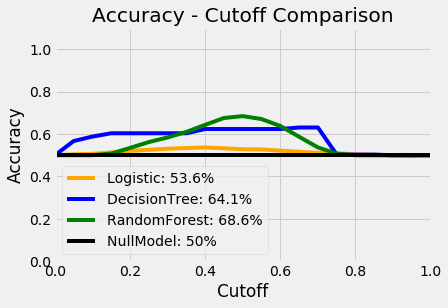

In [13]:
# Acc Curve by cutoff
# ===========================================================
# matplotlib.use('TkAgg')
fig = plt.figure()
plt.xlabel('Cutoff')
plt.ylabel('Accuracy')
plt.title('Accuracy - Cutoff Comparison')
plt.plot(LR_CUTOFF, LR_ACC, color='orange')
plt.plot(DT_CUTOFF, DT_ACC, color='blue')
plt.plot(RF_CUTOFF, RF_ACC, color='green')
plt.plot(AD_CUTOFF, AD_ACC, color='red')
plt.plot(np.arange(0, 1.1, 0.1), [0.5 for i in np.arange(0, 1.1, 0.1)], color='black')
plt.axis([0, 1, 0, 1.1])
plt.legend(['Logistic: 53.6%', 'DecisionTree: 64.1%', 'RandomForest: 68.6%', 'Adaboost: %', 'NullModel: 50%'])
plt.show()
fig.savefig('Accuracy - Cutoff Comparison.png', bbox_inches='tight')